Akbank Makine Öğrenmesi Bootcamp kapsamında yaptığım projede bir sınıflandırma
[classification] konusu ele aldım.
Proje kapsmında kaggle üzerinden eriştiğim Diyabet Risk Tahmini [Diabetes Risk Prediction] isimli dataset üzerinden modelimi eğittim ve çalışmalar gerçekleştirdim.


Dataset kaynakça:https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction?resource=download

# Gerekli Kütüphaneleri İçeri Aktarma (İmport)

In [107]:
#Projede Veri Entegrasyonu, Veri Manipülasyonu, Veri Analizi ve Görselleştirme gibi işlemleri gerçekleştirmek amacıyla pandas kütüphanesi import edilmiştir.
import pandas as pd
import numpy as np

#Veri görselleştirme için kullanacağımız temel Python kütüphaneleridir.
import matplotlib.pyplot as plt
import seaborn as sns

#Elimizde bulunan tek data setini train ve test olarak ikiye ayırabilmek için sklearn kütüphanesinden train_test_split import edilmiştir.
from sklearn.model_selection import train_test_split

#Elimizdeki string tipinde bulunan verileri sayısal formata çevirmek için LabelEncoder import edilmiştir.
from sklearn.preprocessing import LabelEncoder

#Proje kapsamında en az hata ile çalışan algoritma RandomForestClassifier olmasından ötürü bu modül import edilmiştir.
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
# Import Classification Report function
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

# Data Setinin içeri aktarılması
Elimizdeki data seti diyabet hastalığının teşhisinde kullanılan bazı parametreleri içermektedir.Bu parametreler sırası ile şöyledir:

*   Yaş(Age): Bu, bireyin yıl cinsinden yaşını temsil eder.
*   Cinsiyet(Gender): Bu bireyin cinsiyetidir. Erkek veya Kadın olabilir.
*   Poliüri(Polyuria): Bu, diyabetin yaygın bir belirtisi olan aşırı idrara çıkma varlığı anlamına gelir.
*   Polidipsi(Polydipsia): Bu, diyabetin bir başka yaygın belirtisi olan aşırı susama anlamına gelir.
*   Ani kilo kaybı(Sudden weight loss): Bu, bireyin diyabet belirtisi olabilecek açıklanamayan kilo kaybı yaşayıp yaşamadığını gösterir.
*   Zayıflık(Weakness): Bu, bireyin potansiyel bir diyabet belirtisi olan genel fiziksel zayıflık yaşayıp yaşamadığını gösterir.
*   Polifaji(Polyphagia): Bu, diyabetin bir başka potansiyel semptomu olan aşırı açlığı ifade eder.
*   Genital pamukçuk(Genital thrush): Bu, genital bölgede kaşıntıya, ağrıya ve diğer rahatsızlıklara neden olabilen bir mantar enfeksiyonudur. Diyabetli kişilerde daha yaygın olabilir.
*  Görsel bulanıklık(Visual blurring): Bu, bireyin potansiyel bir diyabet belirtisi olan bulanık görme yaşayıp yaşamadığını gösterir.
*  Kaşıntı(Itching): Bu, bireyin diyabet belirtisi olabilecek genel kaşıntı yaşayıp yaşamadığını gösterir.
*   Sinirlilik(Irritability): Bu, bireyin diyabet belirtisi olabilecek sinirlilik yaşayıp yaşamadığını gösterir.
*   Gecikmiş iyileşme(Delayed healing): Bu, bireyin diyabet belirtisi olabilecek yaraların yavaş iyileşip iyileşmediğini gösterir.
*   Kısmi parezi(Partial paresis): Bu, diyabetin bir belirtisi olabilen, gönüllü hareketin kısmi kaybı anlamına gelir.
*   Kas sertliği(Muscle stiffness): Bu, bireyin diyabet belirtisi olabilecek kas sertliği yaşayıp yaşamadığını gösterir.
*   Alopesi(Alopecia): Bu, diyabetin bir belirtisi olabilen saç dökülmesini ifade eder.
*   Obezite(Obesity): Bu, bireyin diyabet için önemli bir risk faktörü olan obez olup olmadığını gösterir.












In [108]:
#data değişkenine pandas kütüphanesi aracılığı ile elmizdeki datalar atanmıştır.
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")

# Keşifsel Veri Analizi (EDA — Exploratory Data Analysis)
Pandas, matplotlib, seaborn gibi kütüphaneler kullanarak elimizdeki veri seti hakkında bilgilere ulaşılmış ve veri seti daha kolay gözlemlenebilir hale getirilmiştir

**Numerical EDA**

Öncelikle pandas kütüphanesi yardımı ile data setinin bir kısmını gözlemleyelim

In [109]:
#Veri setinin ilk 5 örneği tabloda listelenmiştir
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [110]:
##Veri setinin son 5 örneği tabloda listelenmiştir
data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Görüldüğü üzere elimizde 520 satır 17 sütundan oluşan bir veri setimiz var. Bu setteki 16 değişkeni tahminleyici olarak , class değişkenini ise hedef değişken olarak kullanacağız.

---

520x16 verinin tamamının non-null olduğunu görüyoruz bu da projede kullanacak olduğumuz numpy, pandas, scikit-learn gibi kütüphanelerin doğru çalışması için veri setimizin uygun olduğu anlamına geliyor.

In [112]:
data.describe()
#Bu kısmı sor https://gokerguner.medium.com/machine-learning-1-7d4581caa291 burada gösterilen describe ile aynı değerleri vermiyor

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


**Visual EDA**

Örnek olarak ani kilo kaybı (sudden weight loss)  değişkeninin diyabet hastalığının pozitif veya negatif olmasına göre dağılımı incelenmiştir

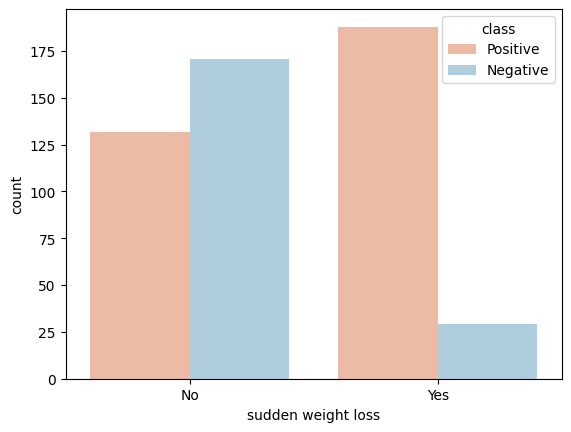

In [113]:
plt.figure()
sns.countplot(x='sudden weight loss', hue='class', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Grafikten de açıkça görüldüğü üzere ani kilo kaybı, diyabet teşhisi pozitif olan kişilerde negatif olan kişilere göre oldukça fazladır.Bu bilgi ile ani kilo kaybının diyabet teşhisi konusunda oldukça önemli bir rol oynadığı sonucuna varabiliriz.

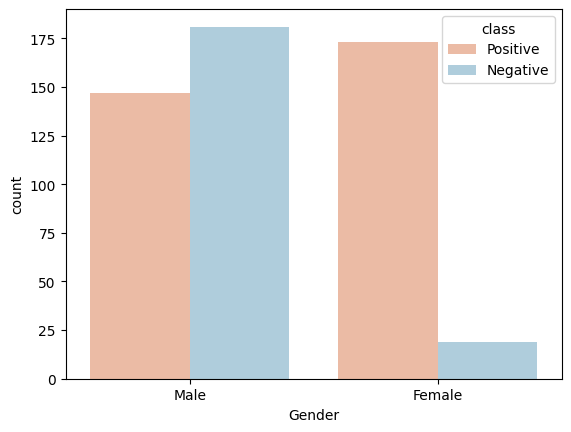

In [114]:
plt.figure()
sns.countplot(x='Gender', hue='class', data=data, palette='RdBu')
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

Bu örnekte de elimizdeki veri setine göre diyabet hastalığının hangi cinsiyette daha yaygın olduğunu görselleştirerek elde etmiş olduk.

#Veri Ön İşleme
**Label-Encoding**

Veri setimizde bulunan "Male", "Female", "Yes", "No", "Positive", "Negative" gibi string tipindeki değişkenlerin proje kapsamında kullan kütüphanelerde doğru işlenebilmesi için ilk kısımda import ettiğimiz LabelEncoder aracılığı ile sayısal verilere çevrilmiştir.

In [115]:
#LabelEncoder le değişkenine tanımlanmıştır.
le = LabelEncoder()
#Sayısal verilere yani 1 ve 0 lara dönüştürmek istediğimiz veriler listelenmiştiş, daha sonra LabelEncoder ile veri dönüşümü gerçekleştirilmiştir.
donusturulecek_sutunlar = ["Polyuria","Polydipsia","sudden weight loss","weakness","Polyphagia","Genital thrush","visual blurring","Itching","Irritability"	,"delayed healing","partial paresis","muscle stiffness"	,"Alopecia","Obesity","Gender","class"]
for i in donusturulecek_sutunlar:
    data[i] = le.fit_transform(data[i])

In [116]:
data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Encode uyguladığımız veri setinin yeni halini görselleştirmek için tail fonksiyonu kullanılmıştır.Burada görüleceği üzere

*   Female -> 0
*   Male -> 1

*   Yes -> 1
*   No -> 0

*   Positive -> 1
*   Negative -> 0

olacak şekilde değişkenler Encode edilmiştir


**Tahminleyici ve Hedef Değişkenleri Ayırma**

Veri setimizde bulunan 16 değişkenin 15 i tahminleyici , class değişkeni ise hedef değişken olacak şekilde ayırma işlemi uygulanmıştır.

In [117]:
#Tahminleyici değişkenler X olarak tanımlanmıştır.
X = data.drop('class', axis="columns")
#Hedef değişken Y olarak tanımlanmıştır.
Y = data.loc[:,'class']

**Eğitim , Test kümelerini Ayırma**

Veri setimizde bulunan verilerin bir kısmı modeli eğitmek için bir kısmı ise modeli test etmek için ayırma işlemi yapılmıştır.


In [134]:
X_train , X_test , Y_train, Y_test = train_test_split(X, Y , test_size = 0.3)

In [135]:
print(X_test.shape)

(156, 16)


Görüldüğü üzere 156 sütunluk veri, yani veri setinin %30 u modeli test etmek için
ayırılmıştır.

# Model Seçimi
Proje kapsamında şu modeller kullanılarak deneme yapılmıştır:
* LogisticRegression
* RidgeClassifier
* DecisionTreeClassifier
* GaussianNB
* MLPClassifier
* RandomForestClassifier

Yapılan denemeler sonucunda Çapraz doğrulama(cross validation) gibi çeşitli doğrulama yöntemleri kullanılıp modelin başarısını ölçükten sonra en az hatayla çalışan modelin RandomForestClassifier olduğuna karar verilmiştir.



In [136]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

Öncelikle 5 katlı çapraz doğrulama ile model başarısı ölçülmüştür.

In [137]:
#5 katlı çapraz doğrulama uygulanmıştır
cv_scores = cross_val_score(model, X, Y, cv=5)
print("Çapraz Doğrulama Skorları:", cv_scores)
print("Ortalama Doğruluk:", cv_scores.mean())
conf_mat = confusion_matrix(Y, model.predict(X))
print("Confusion Matrix:")
print(conf_mat)

Çapraz Doğrulama Skorları: [0.98076923 0.99038462 0.92307692 1.         1.        ]
Ortalama Doğruluk: 0.9788461538461538
Confusion Matrix:
[[199   1]
 [  2 318]]


Model daha önce test ve train olarak ayırdığımız veri seti kümelerinden X_train ve Y_train ile eğitilmiş daha sonra test kümesi ile test edilmiştir.

In [138]:
predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))

[[58  1]
 [ 2 95]]


Test veri kümesiyle test ettiğimiz modelin confusion matrixini incelediğimizde yalnıza 2 adet falsePositive tahmininde bulunduğu, geri kalan denemelerde doğru tahminler yaptığı görülmektedir.

# Hiperparametre Optimizasyonu
RandomForestClassifier modelinin hiper parametreleri Grid Search yöntemi ile optimize edilmiştir.

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
rf = RandomForestClassifier()
# random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
          }



In [126]:
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=300, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train,Y_train)

In [139]:
# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

Best random search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Best random search score is: 0.9779840130063677


In [140]:
best_params = model_random.best_params_
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, Y_train)
predictions3 = rf_best.predict(X_test)
print(confusion_matrix(Y_test, predictions3))

[[58  1]
 [ 1 96]]


In [141]:
report = classification_report(Y_test,predictions3)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.99      0.99      0.99        97

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156

